In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

In [146]:
path = "/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/output/GSC_debug/hidden_spike_counts.npy"#"/home/ts468/PhD/Intel-Neuromorphic-Research-Project/output/reduced_hidden_size_200e_run_debug/hidden_spike_counts.npy"
output = pd.read_csv("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/output/GSC_debug/train_output.csv")#"/home/ts468/PhD/Intel-Neuromorphic-Research-Project/output/reduced_hidden_size_200e_run_debug/train_output.csv")
hidden_spikes = np.load(path)

In [147]:
hidden_spikes.shape[0]

100

In [148]:
len(hidden_spikes[0])

256

In [149]:
sum_over_epoch = []

In [150]:
for i in range(hidden_spikes.shape[0]):
    sum_over_epoch.append(sum(hidden_spikes[i]))

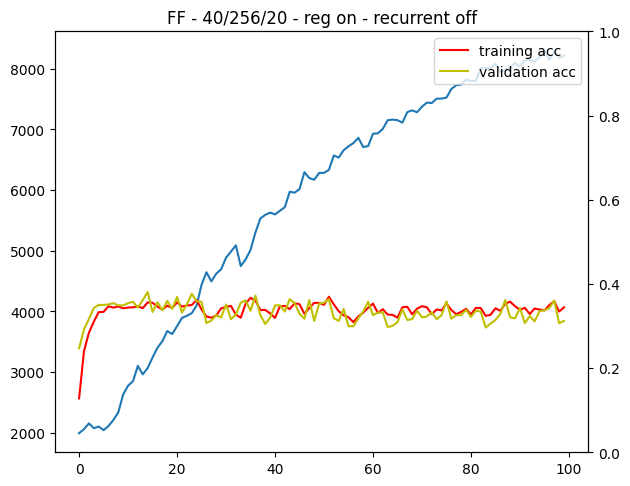

In [151]:
fig, ax1 = plt.subplots()

ax1.plot(sum_over_epoch, label = "average hidden layer spikes per epoch")

ax2 = ax1.twinx()

ax2.plot(list(output.loc[:, "accuracy"])[0::2], color = 'r', label = "training acc")
ax2.plot(list(output.loc[:, "accuracy"])[1::2], color = 'y', label = "validation acc")
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.title("FF - 40/256/20 - reg on - recurrent off")
plt.legend()
plt.show()

In [152]:
with open("params.json", "r") as f:
        params = json.load(f)

In [153]:
print(list(params) + ["accuracy"])

['NUM_INPUT', 'NUM_HIDDEN', 'NUM_OUTPUT', 'BATCH_SIZE', 'INPUT_FRAME_TIMESTEP', 'INPUT_SCALE', 'NETWORK_SCALE', 'NUM_EPOCH', 'NUM_FRAMES', 'verbose', 'debug', 'lr', 'dt', 'reg_lambda_lower', 'reg_lambda_upper', 'reg_nu_upper', 'recurrent', 'evaluate', 'input_hidden_w_mean', 'input_hidden_w_sd', 'hidden_hidden_w_mean', 'hidden_hidden_w_sd', 'hidden_output_w_mean', 'hidden_output_w_sd', 'aug_combine_images', 'aug_swap_pixels', 'aug_swap_pixels_kSwap', 'aug_swap_pixels_pSwap', 'aug_swap_pixels_tSwap', 'cross_validation', 'cross_validation_run_all', 'sweeping_suffix', 'output_dir', 'model_description', 'accuracy']


In [154]:
(list(params.values()) + [0.323])

[40,
 256,
 35,
 256,
 20,
 0.00099,
 0.95,
 1,
 80,
 True,
 True,
 0.008,
 1,
 1e-12,
 1e-12,
 4,
 True,
 False,
 0.0,
 3.5,
 0.0,
 0.02,
 3.0,
 1.5,
 False,
 False,
 1,
 0.2,
 0.1,
 False,
 True,
 '',
 'HD_debug',
 'run',
 0.323]

In [155]:
list(range(7000, 371200, 7424))

[7000,
 14424,
 21848,
 29272,
 36696,
 44120,
 51544,
 58968,
 66392,
 73816,
 81240,
 88664,
 96088,
 103512,
 110936,
 118360,
 125784,
 133208,
 140632,
 148056,
 155480,
 162904,
 170328,
 177752,
 185176,
 192600,
 200024,
 207448,
 214872,
 222296,
 229720,
 237144,
 244568,
 251992,
 259416,
 266840,
 274264,
 281688,
 289112,
 296536,
 303960,
 311384,
 318808,
 326232,
 333656,
 341080,
 348504,
 355928,
 363352,
 370776]